## Data Preprocessing

### 1. Reading data

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
from subprocess import check_output
import missingno as msno

data_dir = './zillow data/'
print(check_output(["ls", data_dir]).decode("utf8"))

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
zillow_data_dictionary.xlsx



In [15]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
train_2016  = pd.read_csv('./zillow data/train_2016_v2.csv')
train_2017  = pd.read_csv('./zillow data/train_2017.csv')

In [7]:
properties_2016 = pd.read_csv('./zillow data/properties_2016.csv')
properties_2017 = pd.read_csv('./zillow data/properties_2017.csv')

In [9]:
zillow_dictionary = pd.read_excel('./zillow data/zillow_data_dictionary.xlsx')

In [19]:
submission = pd.read_csv('./zillow data/sample_submission.csv')

In [23]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [25]:
print ("Shape Of Train: ",train_2016.shape)
print ("Shape Of Properties: ",properties_2016.shape)
print("Shape Of Submission: ",submission.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)
Shape Of Submission:  (2985217, 7)


In [28]:
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


### Merge training data with properties

In [43]:
merged_2016 = pd.merge(train_2016,properties_2016,on="parcelid",how="left")
merged_2017 = pd.merge(train_2017,properties_2017,on="parcelid",how="left")

### Visualize missing value of Properties

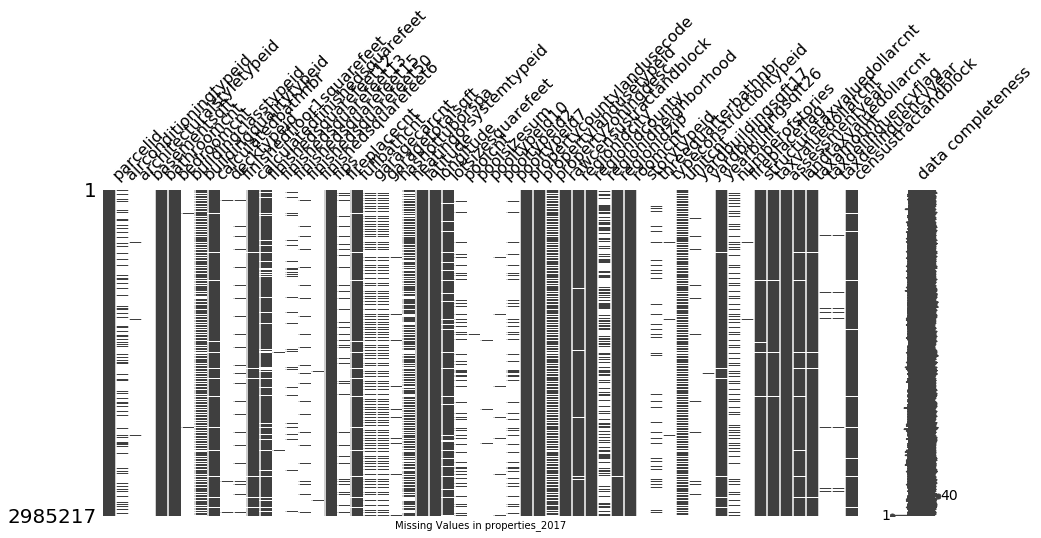

In [13]:
file = 'properties_2017'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

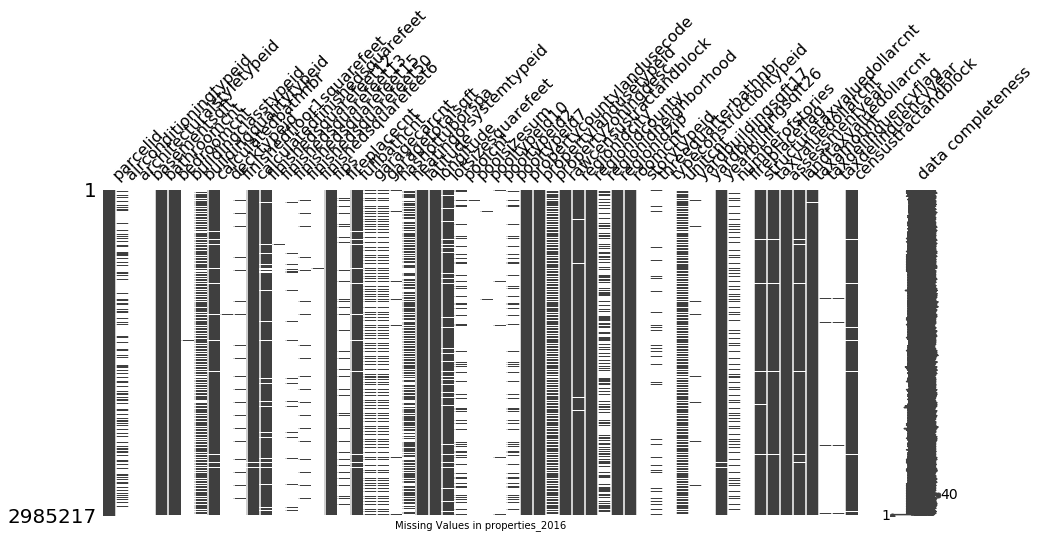

In [14]:
file = 'properties_2016'
msno.matrix(df=eval(file), figsize=(15,6),labels = True)
plt.xlabel('Missing Values in ' + file)
plt.show()

### Missing value of merged data

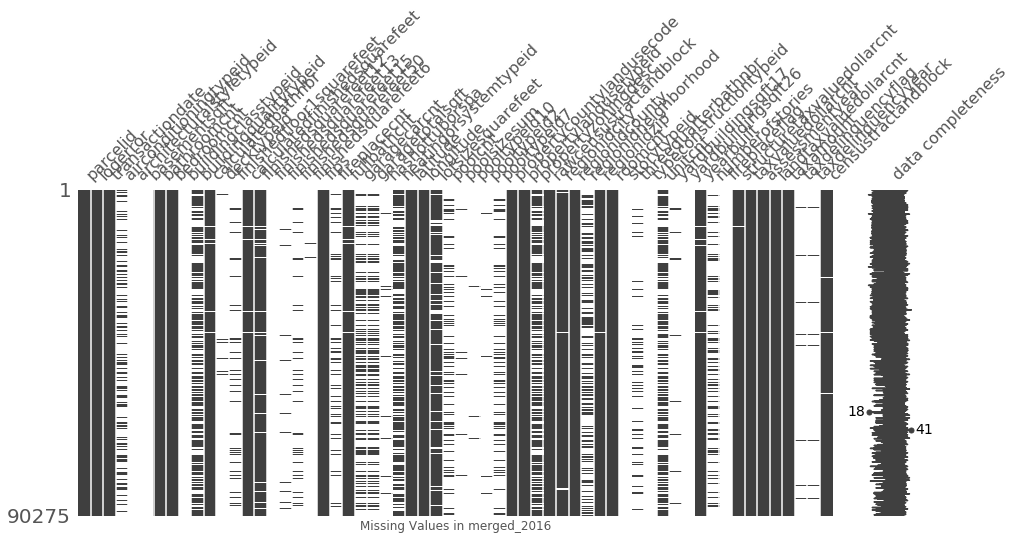

In [44]:
file = 'merged_2016'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

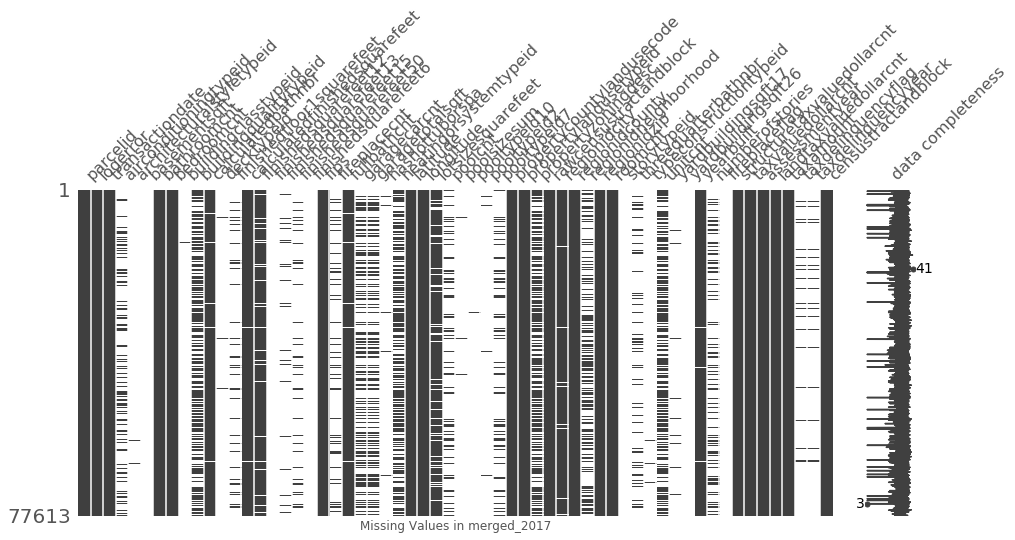

In [45]:
file = 'merged_2017'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

###  Drop some of columns with too many missing value of properties data

In [49]:
drop_index_2016 = [5,6,9,12,16,19,25,31,32,33,44,46,48,49,52]
drop_index_2017 = [5,6,9,12,16,19,25,31,32,33,44,46,48,49,52]

In [50]:
drop_name_2016 = list()
drop_name_2017 = list()
for i, element in enumerate(merged_2016.columns):
    if i+1 in drop_index_2016:
        drop_name_2016.append(element)

for i, element in enumerate(merged_2017.columns):
    if i+1 in drop_index_2017:
        drop_name_2017.append(element)

In [51]:
merged_2016_new = merged_2016.drop(drop_name_2016,axis = 1)
merged_2017_new = merged_2017.drop(drop_name_2017,axis = 1)

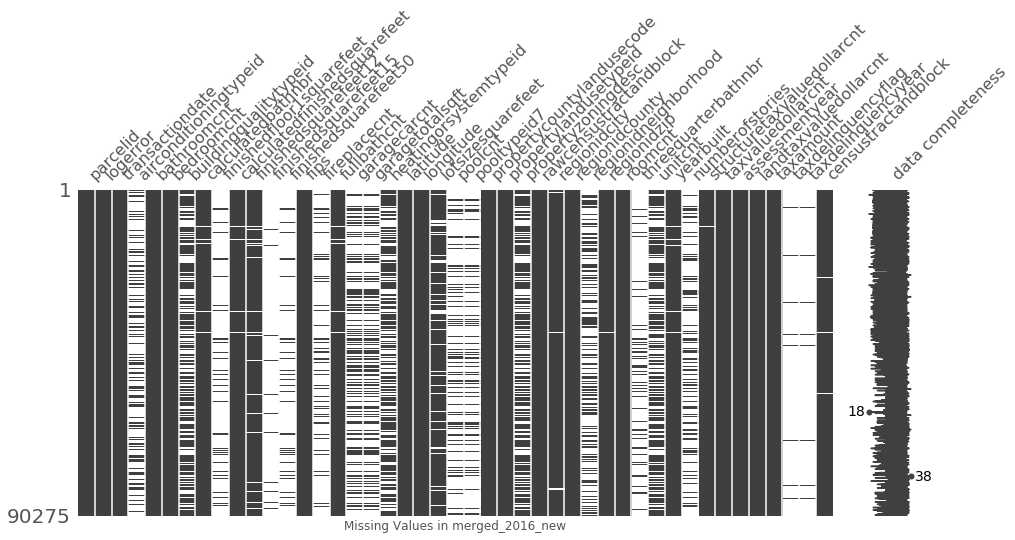

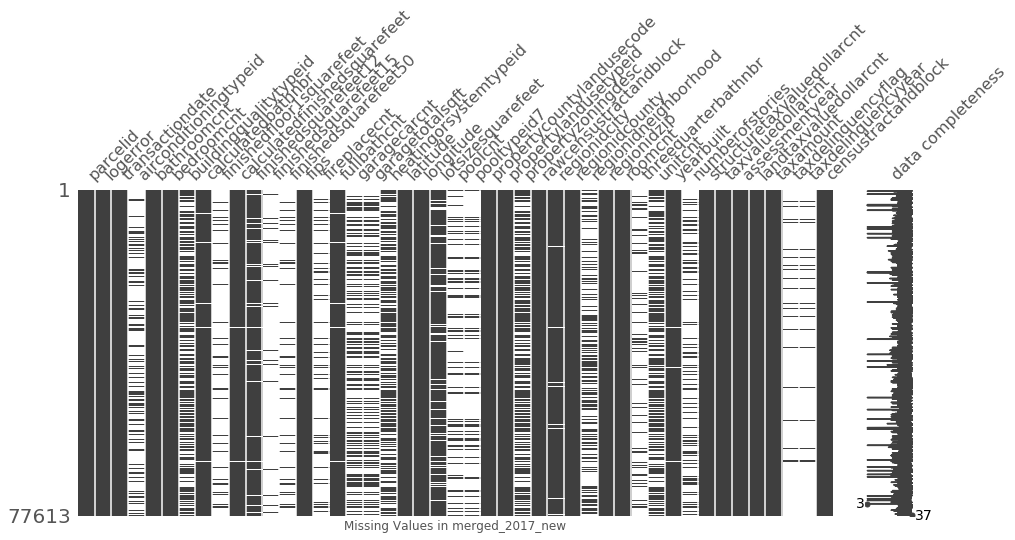

In [53]:
file1 = 'merged_2016_new'
msno.matrix(df=eval(file1), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file1)
plt.show()
file2 = 'merged_2017_new'
msno.matrix(df=eval(file2), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file2)
plt.show()

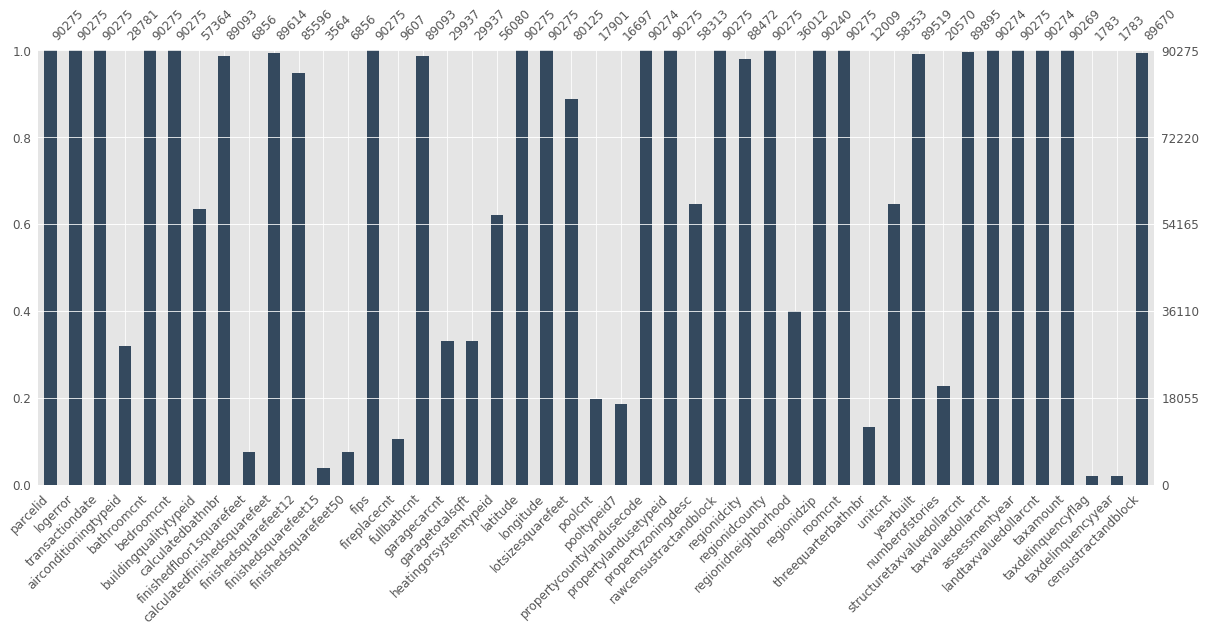

In [60]:
missingValueColumns = merged_2016_new.columns.tolist()
msno.bar(merged_2016_new[missingValueColumns],figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

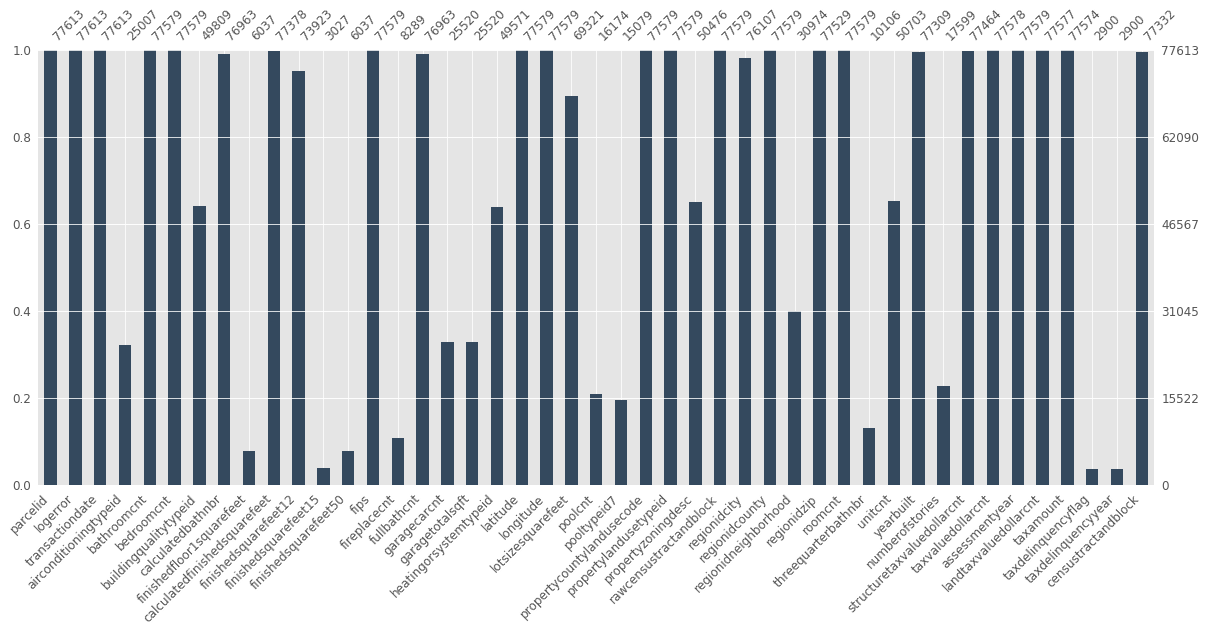

In [61]:
missingValueColumns = merged_2017_new.columns.tolist()
msno.bar(merged_2017_new[missingValueColumns],figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

### Saving data

In [56]:
merged_2016_new.to_csv('./zillow data/merged_drop_new2016.csv')

In [58]:
merged_2017_new.to_csv('./zillow data/merged_drop_new2017.csv')